In [1]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ElMehdi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r"C:\Users\ElMehdi\Documents\Projects\Super-store-data-analysis\Sample - Superstore.csv", encoding='ISO-8859-1')

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

##### No null value found

In [5]:
# cheking for duplicates

if df.duplicated().sum() > 0 :
    print("Duplicates exist")
else:
    print("No duplicates found")


No duplicates found


#### Customer Segmentation

In [6]:
# Types of customer

types_of_customer = df['Segment'].unique()
print(types_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [7]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Type of customer'})

In [8]:
print(number_of_customers)

  Type of customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


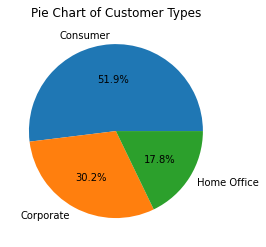

In [9]:
plt.pie(
    number_of_customers['count'],
    labels=number_of_customers['Type of customer'],
    autopct = '%1.1f%%'
)
plt.title("Pie Chart of Customer Types")
plt.show()

#### Customer Sales Insight

  Types of Customer   Total Sales
0          Consumer  1.161401e+06
1         Corporate  7.061464e+05
2       Home Office  4.296531e+05


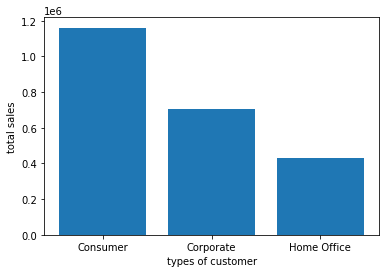

In [10]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Types of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)

plt.bar(sales_per_segment ['Types of Customer'], sales_per_segment['Total Sales'])
plt.xlabel('types of customer')
plt.ylabel('total sales')
plt.show()

### Exploring Customer loyalty

In [11]:
# customer order frequency

customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [12]:
# renaming order id

customers_order_frequency.rename(columns={'Order ID' : 'Total Order'}, inplace=True)

In [13]:
# sorting the total order desc

repeat_customers = customers_order_frequency[customers_order_frequency['Total Order'] >=1]

repeat_customers_sorted = repeat_customers.sort_values(by='Total Order', ascending = False)

print(repeat_customers_sorted.head(12).reset_index(drop = True))

   Customer ID        Customer Name      Segment  Total Order
0     WB-21850        William Brown     Consumer           37
1     PP-18955           Paul Prost  Home Office           34
2     JL-15835             John Lee     Consumer           34
3     MA-17560         Matt Abelman  Home Office           34
4     SV-20365          Seth Vernon     Consumer           32
5     JD-15895     Jonathan Doherty    Corporate           32
6     CK-12205  Chloris Kastensmidt     Consumer           32
7     EH-13765         Edward Hooks    Corporate           32
8     EP-13915           Emily Phan     Consumer           31
9     ZC-21910     Zuschuss Carroll     Consumer           31
10    AP-10915       Arthur Prichep     Consumer           31
11    LC-16870        Lena Cacioppo     Consumer           30


In [14]:
# Calculating customer sales

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sorting the customer sales

Top_spenders = customer_sales.sort_values(by = 'Sales', ascending=False)

print(Top_spenders)

    Customer ID    Customer Name      Segment      Sales
700    SM-20320      Sean Miller  Home Office  25043.050
741    TC-20980     Tamara Chand    Corporate  19052.218
621    RB-19360     Raymond Buch     Consumer  15117.339
730    TA-21385     Tom Ashbrook  Home Office  14595.620
6      AB-10105    Adrian Barton     Consumer  14473.571
..          ...              ...          ...        ...
659    RS-19870       Roy Skaria  Home Office     22.328
508    MG-18205  Mitch Gastineau    Corporate     16.739
145    CJ-11875     Carl Jackson    Corporate     16.520
456    LD-16855     Lela Donovan    Corporate      5.304
760    TS-21085    Thais Sissman     Consumer      4.833

[793 rows x 4 columns]


#### Exploring Shipping Strategies

In [15]:
# Counting shipping model and renaming columns

shipping_model = df['Ship Mode'].value_counts().reset_index()

shipping_model = shipping_model.rename(columns={'index' : 'Use Frequency', 'Ship Mode' : 'Mode of Shipement'})

print(shipping_model)

  Mode of Shipement  count
0    Standard Class   5968
1      Second Class   1945
2       First Class   1538
3          Same Day    543


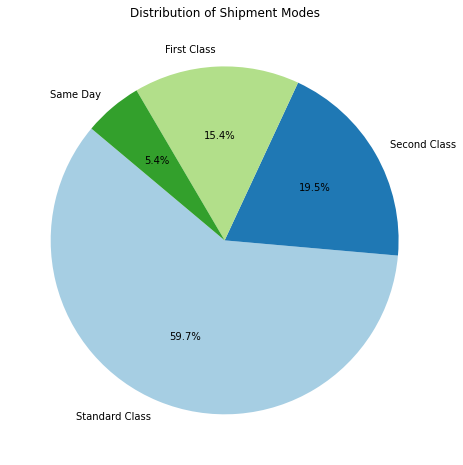

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(
    shipping_model['count'],
    labels=shipping_model['Mode of Shipement'],
    autopct='%1.1f%%', 
    startangle=140,  
    colors=plt.cm.Paired.colors 
)
plt.title('Distribution of Shipment Modes') 
plt.show()

In [17]:
# Exploring Sales by States and cities, counting and renaming the columns

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index' : 'State', 'State' : 'Number of Customers'})

print(state.head(20))

   Number of Customers  count
0           California   2001
1             New York   1128
2                Texas    985
3         Pennsylvania    587
4           Washington    506
5             Illinois    492
6                 Ohio    469
7              Florida    383
8             Michigan    255
9       North Carolina    249
10             Arizona    224
11            Virginia    224
12             Georgia    184
13           Tennessee    183
14            Colorado    182
15             Indiana    149
16            Kentucky    139
17       Massachusetts    135
18          New Jersey    130
19              Oregon    124


In [18]:
city = df['City'].value_counts().reset_index()
print(city.head(10))

            City  count
0  New York City    915
1    Los Angeles    747
2   Philadelphia    537
3  San Francisco    510
4        Seattle    428
5        Houston    377
6        Chicago    314
7       Columbus    222
8      San Diego    170
9    Springfield    163


In [19]:
# Calculating and sorting Sales by States

state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

top_sales = state_sales.sort_values(by='Sales', ascending=False)

print(top_sales.head(10))

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


In [20]:
# Calculating and sorting Sales by Cities

city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


In [21]:
# looking for the popular product

products = df['Category'].unique()

print(products)

['Furniture' 'Office Supplies' 'Technology']


In [22]:
product_subcategory = df['Sub-Category'].unique()

print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [23]:
# Counting and sorting the subcategory

subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

subcategory_count = subcategory_count.sort_values(by ='Sub-Category', ascending = False)

print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [24]:
# Calculating the sales by subcategory

subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = False)

print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


In [25]:
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

top_product_category = product_category.sort_values(by='Sales', ascending = False)

print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


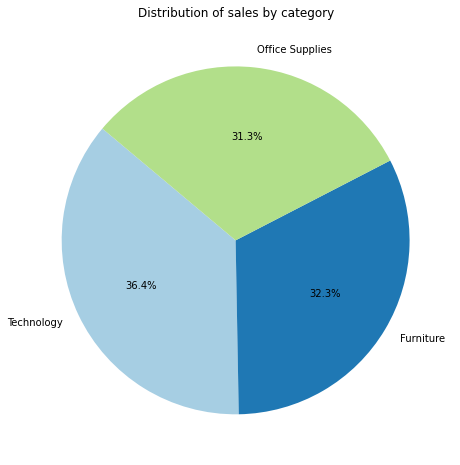

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_product_category['Sales'],
    labels=top_product_category['Category'],
    autopct='%1.1f%%', 
    startangle=140,  
    colors=plt.cm.Paired.colors 
)
plt.title('Distribution of sales by category') 
plt.show()

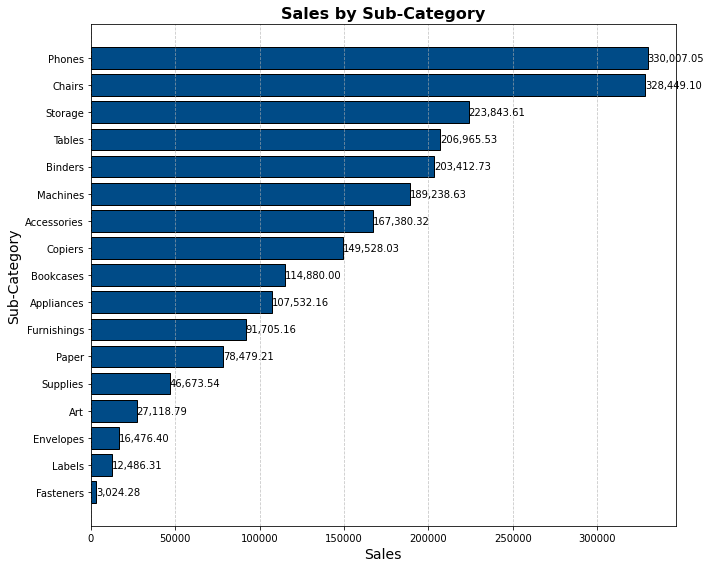

In [27]:
# Sorting the subcategory sales

subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)

plt.figure(figsize=(10, 8))

plt.barh(
    subcategory_count_sales['Sub-Category'],  # y-axis labels
    subcategory_count_sales['Sales'],  # x-axis values
    color='#004B87',  # Optional: Bar color
    edgecolor='black'  # Optional: Add edges to bars
)


plt.title('Sales by Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Sub-Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(subcategory_count_sales['Sales']):
    plt.text(value, index, f'{value:,.2f}', va='center')

plt.tight_layout()
plt.show()
